In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [63]:
df=pd.read_csv("iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
df.head(25)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


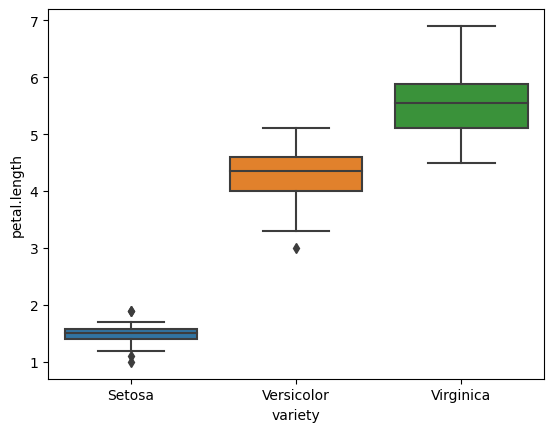

In [65]:
sns.boxplot(x="variety",y="petal.length",data=dataset)
plt.show()

<Axes: xlabel='petal.length', ylabel='petal.width'>

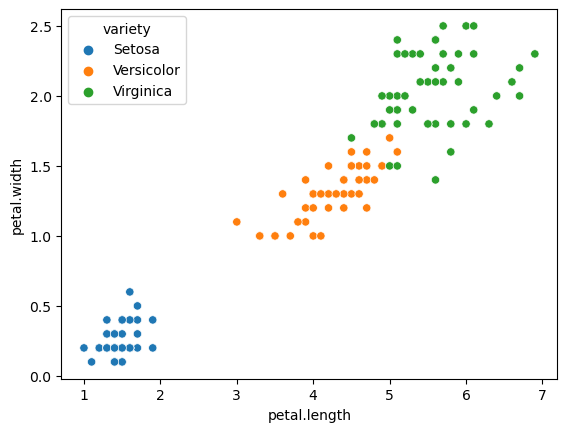

In [66]:
# Scatterplot of different classes of iris using petal length and petal width
sns.scatterplot(x='petal.length', y='petal.width', hue="variety", data=dataset)

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

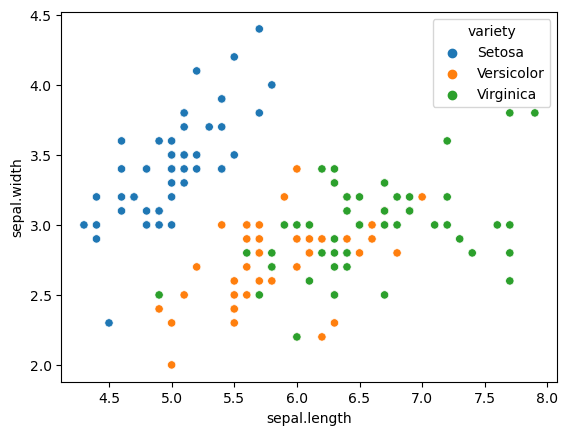

In [67]:
# Scatterplot of different classes of iris using sepal length and sepal width
sns.scatterplot(x='sepal.length', y='sepal.width', hue="variety", data=dataset)

In [68]:
y = df['variety']

In [69]:
# Encode the class of the iris from categorical to a numeric value
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_encoded=le.fit_transform(y)

In [70]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
# Split dataset into Train and Test set

# X is an independent variables
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y_encoded,test_size=0.2)

In [72]:
# Train using logistic regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# Predict Iris variety for test data
y_pred=clf.predict(X_test)

In [74]:
# Evaluate Logistic Regression Model Performance
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred, labels=[0,1,2])
cnf_matrix

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 10]])

In [75]:
# Inverse transform the numeric target variable back to the original class name

y_pred_orig= le.inverse_transform(y_pred)

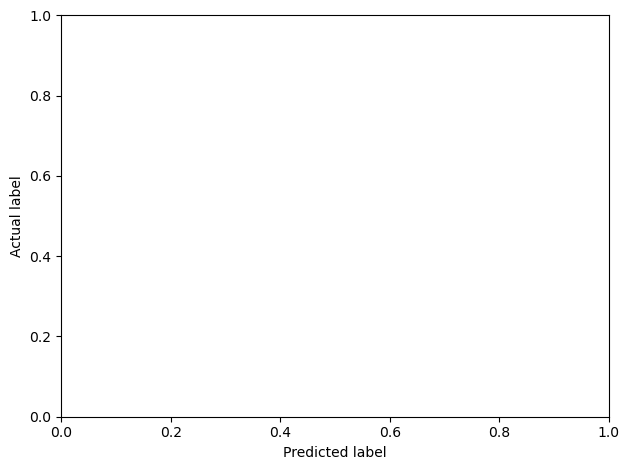

In [80]:
def plot_confusion_matrix(cm, variety,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
   
   
    import itertools
    
    print('Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(variety))
    plt.xticks(tick_marks, variety, rotation=90)
    plt.yticks(tick_marks, variety)
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), 
range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

Confusion Matrix


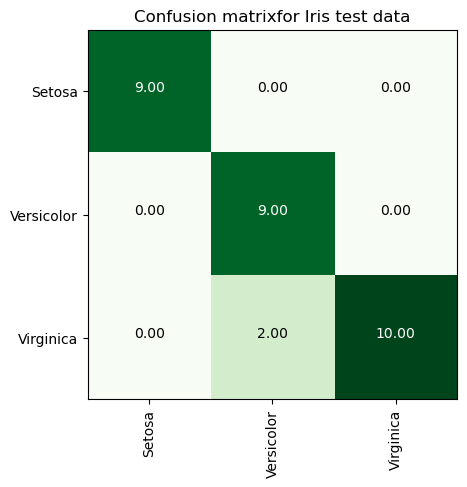

In [82]:
# Displaying the confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, variety=le.classes_,
                      title='Confusion matrixfor Iris test data')

Logistic regression is used for binary or multi-class classification, and the target variable always has to be categorical.